In [9]:
import pandas as pd
import dicts
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


# Estandarizar Código del Municipio

In [12]:
df=pd.read_csv("Cancer_1998_2018.csv")
df["codmunicipio"]=df["codmunre"]#df.apply(lambda x: str(x.codptore).zfill(2)+str(x.codmunre).zfill(3),axis=1)
df=df.astype({'ano': 'int32',"area_res":'float32'}) #,

# Cargar Lista de municipios excluidos

excluded=['13490', '17495', '19300', '19785', '19845', '23682', '23815',
       '27150', '27160', '27425', '27430', '27450', '27580', '27600',
       '27810', '44035', '44420', '47030', '47205', '47460', '47660',
       '47720', '47960', '47980', '52254', '52480', '70221', '91263',
       '91405', '91407', '91430', '91460', '91530', '91536', '91669',
       '91798', '94343', '94663', '94883', '94884', '94885', '94886',
       '94887', '94888', '97511', '97777', '97889']

Contabilizar el número de casos presentados en el horizonte de tiempo estudiado

len(df[df.codmunicipio.isin(excluded)])

Limitando los análisis a los municipios no excluidos

df=df[~df.codmunicipio.isin(excluded)].copy()

# Unir código del municipio

In [13]:
dictio=pd.DataFrame(pd.read_csv("DIVIPOLA_Municipios.csv"))
dictio.COD=dictio.COD.astype(str)
dictio.COD=dictio.COD.apply(lambda x: x.zfill(5))
dictio=dictio.set_index('COD').T.to_dict()
for i in dictio.keys():
    dictio[i]=dictio[i]['MUNICIPIO']
df["Municipio"]=df["codmunicipio"].map(dictio)

# Crear categorías acordes con el quinquenio/sexenio

In [14]:
df["periodo"]=pd.cut(df.ano, bins=[0, 2002, 2007, 2012, 100000], labels='1998-2002 2003-2007 2008-2012 2013-2018'.split())


# Cálculo de mortalidad bruta por cada grupo de edades quinquenales

In [15]:
table=pd.crosstab(df.periodo, df.gru_ed1, margins=False, margins_name="Total").apply(lambda r: r/r.sum()*100, axis=1)
table.to_clipboard()
table

gru_ed1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
periodo,,,,,,,,,,,,,,,,,
1998-2002,0.026230,0.065574,0.170492,0.708197,2.754098,4.918033,8.786885,12.340984,12.747541,11.934426,10.557377,9.088525,8.196721,6.990164,4.786885,4.577049,1.350820
2003-2007,0.000000,0.062788,0.146505,0.627878,2.208037,4.761406,8.267057,11.228548,13.080787,13.133110,11.197154,9.428631,8.528673,6.697363,5.263709,5.169527,0.198828
2008-2012,0.000000,0.017452,0.139616,0.776614,1.980803,4.232112,7.294939,10.863874,13.019197,13.019197,11.657941,9.537522,8.324607,7.137871,5.759162,6.151832,0.087260
2013-2018,0.005522,0.027608,0.132516,0.596323,1.949092,3.666280,6.095743,9.629507,12.108663,12.876153,11.622771,10.827674,8.574899,7.603114,6.465684,7.818453,0.000000


In [16]:
table=pd.crosstab(df.periodo, df.gru_ed1, margins=False, margins_name="Total")
table.to_clipboard()
table

gru_ed1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
periodo,,,,,,,,,,,,,,,,,
1998-2002,2,5,13,54,210,375,670,941,972,910,805,693,625,533,365,349,103
2003-2007,0,6,14,60,211,455,790,1073,1250,1255,1070,901,815,640,503,494,19
2008-2012,0,2,16,89,227,485,836,1245,1492,1492,1336,1093,954,818,660,705,10
2013-2018,1,5,24,108,353,664,1104,1744,2193,2332,2105,1961,1553,1377,1171,1416,0


#  Cálculo de mortalidad por área de residencia

In [17]:
table=pd.crosstab(df.periodo, df.area_res, margins=True, margins_name="Total")
table.to_clipboard()
table

area_res,1.0,2.0,3.0,9.0,Total
periodo,,,,,
1998-2002,6877,292,373,83,7625
2003-2007,8670,348,470,68,9556
2008-2012,10385,364,660,51,11460
2013-2018,16391,591,1126,3,18111
Total,42323,1595,2629,205,46752


# Cálculo de tasas brutas de mortalidad por departamento

In [18]:
df_pob=pd.DataFrame(pd.read_csv("DatosPoblaci.csv",sep=";"))
df_pob=df_pob.groupby(by=["DP"]).sum().reset_index()
df_pob.columns
df_pob=pd.melt(df_pob, id_vars=["DP"], value_vars=['1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'])
       
df_pob.columns=["codptore","ano","value"]
df_pob.sort_values(by=["value"], ascending=False)
df_pob=df_pob[(df_pob.codptore!=' ')]
df_pob.codptore=df_pob.codptore.astype('int64')
df_pob["id"]=df_pob.apply(lambda x: str(x.ano)+"-"+str(x.codptore),axis=1)


In [19]:
df_mort=pd.DataFrame(pd.crosstab(df.codptore, df.ano).reset_index())
df_mort=pd.melt(df_mort,id_vars=['codptore'],value_vars=[i for i in range(1998,2019)])
df_mort["id"]=df_mort.apply(lambda x: str(x.ano)+"-"+str(x.codptore),axis=1)


In [20]:
new_df = pd.merge(df_mort, df_pob,how='left',on="id")
new_df["tasa"]=new_df["value_x"]/new_df["value_y"]*100000
new_df.sort_values(by="tasa",ascending=False)
new_df["log_pop"]=np.log10(new_df.value_y)
new_df=new_df.dropna()
new_df=new_df[['codptore_x', 'ano_y','value_x', 'value_y', 'tasa', 'log_pop']]
new_df.columns=['codptore', 'ano','fallecidos', 'poblacion', 'tasa', 'log_pop']
new_df.ano=new_df.ano.astype(int)


<AxesSubplot:xlabel='log_pop', ylabel='tasa'>

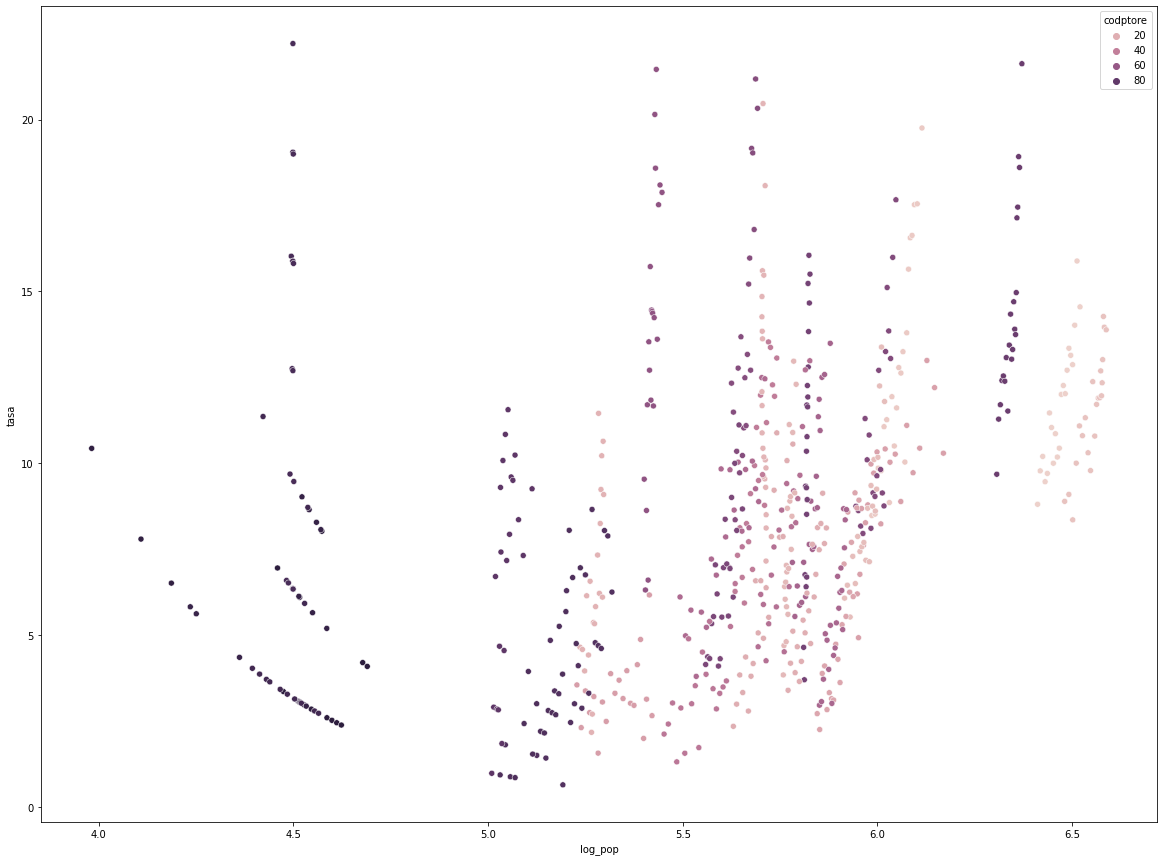

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(data=new_df[new_df.tasa>0], x="log_pop", y="tasa", hue="codptore",ax=ax)

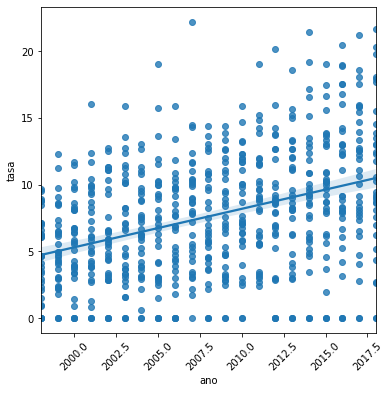

In [22]:
fig,ax=plt.subplots(figsize=(6,6))
sns.regplot(data=new_df[new_df.poblacion>0],x="ano",y="tasa",ax=ax)
plt.xticks(rotation=45)
plt.show()

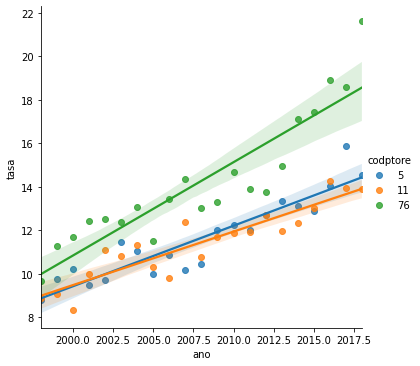

In [23]:
sns.lmplot(data=new_df[new_df.poblacion>1500000],x="ano",y="tasa",hue="codptore")


In [24]:
new_df

,codptore,ano,fallecidos,poblacion,tasa,log_pop
0,5,1998,227,2577848,8.805795,6.411257
1,8,1998,82,967124,8.478747,5.985482
2,11,1998,269,3025702,8.890499,6.480826
3,13,1998,50,823094,6.074640,5.915449
4,15,1998,22,572920,3.839978,5.758094
...,...,...,...,...,...,...
688,91,2018,1,36678,2.726430,4.564406
689,94,2018,1,22976,4.352368,4.361274
690,95,2018,2,38507,5.193861,4.585540
691,97,2018,0,19372,0.000000,4.287174


# Cálculo de las variaciones de tasa entre 1998 y 2018 a nivel departamental.

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


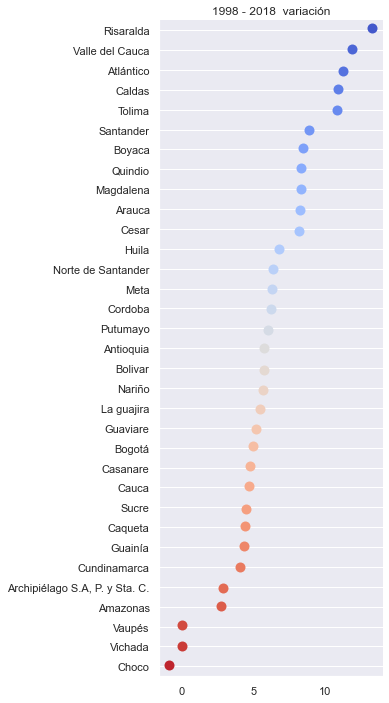

In [25]:
delta_tasa=new_df[new_df.ano.isin([1998,2018])].pivot(index='codptore',columns='ano')[['tasa']]
delta_tasa["delta"]=delta_tasa["tasa"][2018]-delta_tasa["tasa"][1998]
delta_tasa=delta_tasa.sort_values(by="delta",ascending=False).reset_index()

delta_tasa

DPTOS_num=dict()
for i,j in zip(dicts.DPTOS.values(),dicts.DPTOS.keys()):
    DPTOS_num[i]=j


sns.set(style="darkgrid")

#fg, ax = plt.subplots(figsize = (11,9))

delta_tasa["MPIO"]=delta_tasa.codptore.map(DPTOS_num)

g = sns.PairGrid(delta_tasa.sort_values(by="delta",ascending=False), x_vars = 'delta', y_vars = 'MPIO', size = 10, aspect = .4)

g.map(sns.stripplot, size = 10, orient = 'h', palette = 'coolwarm', edgecolor = 'w')

g.set(xlabel='', ylabel='')

titles = ['1998 - 2018  variación']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

In [26]:
display(delta_tasa)

codptore      tasa                 delta                            MPIO
ano               1998       2018                                           
0         66  6.962852  20.325906  13.363054                       Risaralda
1         76  9.679180  21.623094  11.943915                 Valle del Cauca
2          8  8.478747  19.752927  11.274180                       Atlántico
3         17  7.153394  18.075205  10.921811                          Caldas
4         73  4.642849  15.501542  10.858693                          Tolima
5         68  8.747982  17.664391   8.916409                       Santander
6         15  3.839978  12.296083   8.456106                          Boyaca
7         63  9.536070  17.879300   8.343230                         Quindio
8         47  4.659105  12.980677   8.321571                       Magdalena
9         81  0.978924   9.255331   8.276408                          Arauca
10        20  2.345419  10.556806   8.211386                           Cesar
11        41  6.268137  13.060229   6.792092                           Huila
12        54  7.114094  13.488566   6.374473              Norte de Santander
13        50  6.108362  12.455748   6.347386                            Meta
14        23  2.713937   8.926230   6.212294                         Cordoba
15        86  0.931550   6.956885   6.025335                        Putumayo
16         5  8.805795  14.548998   5.743203                       Antioquia
17        13  6.074640  11.795314   5.720674                         Bolivar
18        52  2.959848   8.649719   5.689871                          Nariño
19        44  2.119669   7.567108   5.447439                      La guajira
20        95  0.000000   5.193861   5.193861                        Guaviare
21        11  8.890499  13.881392   4.990894                          Bogotá
22        85  1.500296   6.251322   4.751026                        Casanare
23        19  3.393471   8.116729   4.723258                           Cauca
24        70  4.143624   8.669075   4.525451                           Sucre
25        18  4.648514   9.088843   4.440329                         Caqueta
26        94  0.000000   4.352368   4.352368                         Guainía
27        25  6.197644  10.292106   4.094462                    Cundinamarca
28        88  6.590220   9.468203   2.877983  Archipiélago S.A, P. y Sta. C.
29        91  0.000000   2.726430   2.726430                        Amazonas
30        97  0.000000   0.000000   0.000000                          Vaupés
31        99  0.000000   0.000000   0.000000                         Vichada
32        27  3.549498   2.655911  -0.893586                           Choco

<AxesSubplot:xlabel='tasa', ylabel='Count'>

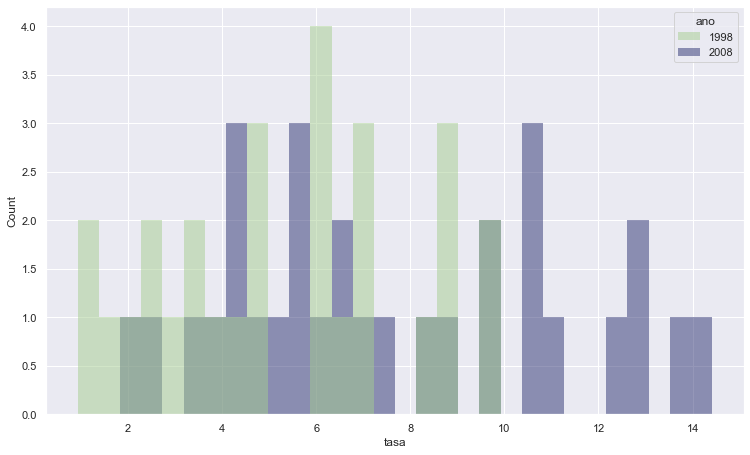

In [27]:

fig,ax=plt.subplots(figsize=(12.5,7.5))
sns.histplot(data=new_df[(new_df.tasa>0) & (new_df.ano.isin([1998,2008]))],x="tasa",hue="ano",cumulative=False,    fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax=ax,bins=30)

# Tasas por municipio

In [29]:
df_pob=pd.DataFrame(pd.read_csv("DatosPoblaci.csv",sep=";"))
df_pob=df_pob.groupby(by=["DPMP"]).sum().reset_index()
df_pob=pd.melt(df_pob, id_vars=['DPMP'], value_vars=['1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'])
df_pob.columns=["codmunre","ano","value"]


In [30]:
df_pob.sort_values(by=["value"], ascending=False)
df_pob=df_pob[(df_pob.codmunre!=' ')]
df_pob.codmunre=df_pob.codmunre.astype('int64')
df_pob["id"]=df_pob.apply(lambda x: str(x.ano)+"-"+str(x.codmunre),axis=1)
df_pob

,codmunre,ano,value,id
0,5001,1998,991843,1998-5001
1,5002,1998,12232,1998-5002
2,5004,1998,1276,1998-5004
3,5021,1998,2395,1998-5021
4,5030,1998,12953,1998-5030
...,...,...,...,...
23557,97889,2018,502,2018-97889
23558,99001,2018,9912,2018-99001
23559,99524,2018,4724,2018-99524
23560,99624,2018,1929,2018-99624


In [31]:
df_mort=pd.DataFrame(pd.crosstab(df.codmunicipio, df.ano).reset_index())
df_mort=pd.melt(df_mort,id_vars=['codmunicipio'],value_vars=[i for i in range(1998,2019)])
df_mort.codmunicipio=df_mort.codmunicipio.astype(int)
df_mort.codmunre=df_mort[df_mort.codmunicipio.notna() & df_mort.codmunicipio!='Total'].dropna()
df_mort["id"]=df_mort.apply(lambda x: str(x.ano)+"-"+str(x.codmunicipio),axis=1)

df_mort

<ipython-input-31-463f97c3eda1>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_mort.codmunre=df_mort[df_mort.codmunicipio.notna() & df_mort.codmunicipio!='Total'].dropna()


,codmunicipio,ano,value,id
0,1999,1998,6,1998-1999
1,5001,1998,117,1998-5001
2,5002,1998,0,1998-5002
3,5004,1998,0,1998-5004
4,5021,1998,1,1998-5021
...,...,...,...,...
21919,999724,2018,0,2018-999724
21920,999840,2018,0,2018-999840
21921,999862,2018,5,2018-999862
21922,99999,2018,0,2018-99999


In [32]:
new_df = pd.merge(df_mort, df_pob,how='left',on="id")
new_df["tasa"]=new_df["value_x"]/new_df["value_y"]*100000
new_df.sort_values(by="tasa",ascending=False)
new_df["log_pop"]=np.log10(new_df.value_y)
new_df=new_df.dropna()
new_df.sort_values(by="tasa",ascending=False)
new_df=new_df[['codmunicipio', 'ano_y','value_x', 'value_y', 'tasa', 'log_pop']]
new_df.columns=['codmunicipio', 'ano','fallecidos', 'poblacion', 'tasa', 'log_pop']
new_df.ano=new_df.ano.astype(int)
new_df


,codmunicipio,ano,fallecidos,poblacion,tasa,log_pop
1,5001,1998,117,991843.0,11.796222,5.996443
2,5002,1998,0,12232.0,0.000000,4.087497
3,5004,1998,0,1276.0,0.000000,3.105851
4,5021,1998,1,2395.0,41.753653,3.379306
5,5030,1998,0,12953.0,0.000000,4.112370
...,...,...,...,...,...,...
21909,97161,2018,0,1340.0,0.000000,3.127105
21910,99001,2018,0,9912.0,0.000000,3.996161
21911,99524,2018,0,4724.0,0.000000,3.674310
21912,99624,2018,0,1929.0,0.000000,3.285332


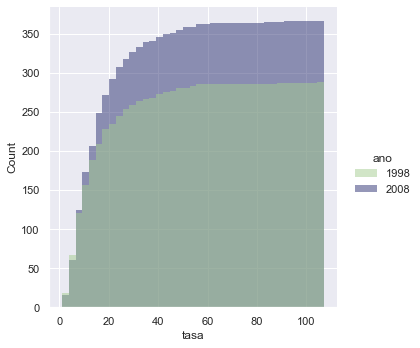

In [33]:
sns.displot(data=new_df[(new_df.tasa>0) & (new_df.ano.isin([1998,2008]))],x="tasa",hue="ano",cumulative=True,  common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

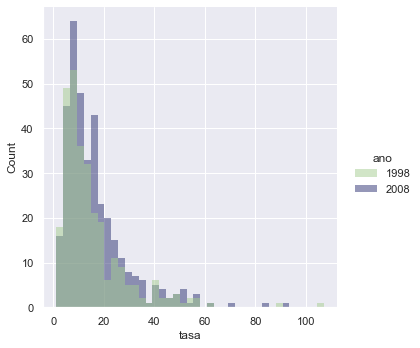

In [34]:

sns.displot(data=new_df[(new_df.tasa>0) & (new_df.ano.isin([1998,2008]))],x="tasa",hue="ano",cumulative=False,    fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

In [35]:
new_df.codmunicipio=new_df.codmunicipio.apply(lambda x: str(x).zfill(5))


In [36]:
dictio=pd.DataFrame(pd.read_csv("DIVIPOLA_Municipios.csv"))
dictio.COD=dictio.COD.astype(str)
dictio.COD=dictio.COD.apply(lambda x: x.zfill(5))
print(dictio.columns)
dictio=dictio.set_index('COD').T.to_dict()
for i in dictio.keys():
    dictio[i]=dictio[i]['MUNICIPIO']

new_df["MPIO"]=new_df.codmunicipio.map(dictio).apply(lambda x: str(x).capitalize())

Index(['COD', 'MUNICIPIO'], dtype='object')


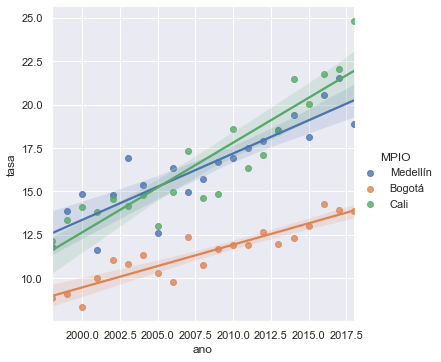

In [37]:
sns.lmplot(data=new_df[new_df.codmunicipio.isin(["11001","76001","05001"])],x="ano",y="tasa",hue="MPIO")

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


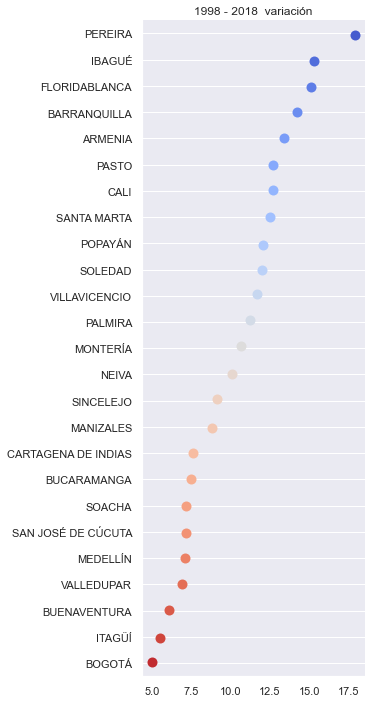

In [38]:

delta_tasa=new_df[(new_df.ano.isin([1998,2018])) & (new_df.poblacion>101000)].sort_values(by="poblacion").pivot(index='codmunicipio',columns='ano')[['tasa']]
delta_tasa["delta"]=(delta_tasa["tasa"][2018]-delta_tasa["tasa"][1998])
delta_tasa=delta_tasa.sort_values(by="delta",ascending=False).reset_index()





delta_tasa["MPIO"]=delta_tasa["codmunicipio"].map(dictio)[:25]

#delta_tasa.MPIO=delta_tasa.MPIO.apply(lambda x: str(x).capitalize())
sns.set(style="darkgrid")

#fg, ax = plt.subplots(figsize = (11,9))

g = sns.PairGrid(delta_tasa.sort_values(by="delta",ascending=False), x_vars = 'delta', y_vars = 'MPIO', size = 10, aspect = .4)

g.map(sns.stripplot, size = 10, orient = 'h', palette = 'coolwarm', edgecolor = 'w')

g.set(xlabel='', ylabel='')

titles = ['1998 - 2018  variación']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

new_df